In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

In [23]:
import warnings
warnings.filterwarnings('ignore')

# Problem1

In [10]:
n = range(5,21) # 5-20 rolling Eurodollar futures

token = '7Fe845GwTuAehy2o1guA'
nms = ["CHRIS/CME_ED"+str(i) for i in n]
dfs = [quandl.get(nm, authtoken=token) for nm in nms]

# put all settle price into one dataframe
settle_price = dfs[0]['Settle']
for i in range(1,16):
    settle1_price = dfs[i]['Settle']
    settle_price = pd.concat([settle_price,settle1_price], axis=1)
settle_price.columns = ['ED'+str(i) for i in n]
settle_price = settle_price.dropna()
settle_price.head(10)

,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,
1992-06-23,94.31,93.75,93.62,93.32,93.05,92.67,92.62,92.41,92.25,91.99,92.01,91.92,91.82,91.59,91.60,91.52
1992-06-24,94.46,93.89,93.75,93.44,93.17,92.78,92.72,92.49,92.32,92.05,92.07,91.97,91.87,91.65,91.66,91.58
1992-06-25,94.55,93.98,93.83,93.51,93.22,92.82,92.76,92.53,92.35,92.08,92.09,91.99,91.89,91.67,91.68,91.60
1992-06-26,94.55,93.97,93.82,93.50,93.21,92.81,92.75,92.52,92.34,92.06,92.07,91.98,91.87,91.64,91.65,91.57
1992-06-29,94.61,94.03,93.87,93.54,93.24,92.83,92.77,92.53,92.35,92.07,92.07,91.97,91.86,91.63,91.64,91.56
1992-06-30,94.60,94.02,93.86,93.53,93.23,92.82,92.76,92.52,92.34,92.06,92.06,91.96,91.85,91.62,91.63,91.55
1992-07-01,94.64,94.06,93.90,93.57,93.27,92.86,92.81,92.57,92.39,92.11,92.11,92.01,91.90,91.67,91.68,91.60
1992-07-02,94.97,94.37,94.17,93.81,93.48,93.06,93.00,92.76,92.58,92.30,92.30,92.20,92.08,91.84,91.84,91.76
1992-07-06,95.06,94.46,94.25,93.88,93.54,93.12,93.06,92.82,92.63,92.35,92.35,92.25,92.12,91.88,91.88,91.80


In [12]:
settle = pd.DataFrame()
for i in range(0,16):
    settle['ED'+str(i+5)] = 100- settle_price.iloc[:,i]
settle.head(10)

,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,
1992-06-23,5.69,6.25,6.38,6.68,6.95,7.33,7.38,7.59,7.75,8.01,7.99,8.08,8.18,8.41,8.40,8.48
1992-06-24,5.54,6.11,6.25,6.56,6.83,7.22,7.28,7.51,7.68,7.95,7.93,8.03,8.13,8.35,8.34,8.42
1992-06-25,5.45,6.02,6.17,6.49,6.78,7.18,7.24,7.47,7.65,7.92,7.91,8.01,8.11,8.33,8.32,8.40
1992-06-26,5.45,6.03,6.18,6.50,6.79,7.19,7.25,7.48,7.66,7.94,7.93,8.02,8.13,8.36,8.35,8.43
1992-06-29,5.39,5.97,6.13,6.46,6.76,7.17,7.23,7.47,7.65,7.93,7.93,8.03,8.14,8.37,8.36,8.44
1992-06-30,5.40,5.98,6.14,6.47,6.77,7.18,7.24,7.48,7.66,7.94,7.94,8.04,8.15,8.38,8.37,8.45
1992-07-01,5.36,5.94,6.10,6.43,6.73,7.14,7.19,7.43,7.61,7.89,7.89,7.99,8.10,8.33,8.32,8.40
1992-07-02,5.03,5.63,5.83,6.19,6.52,6.94,7.00,7.24,7.42,7.70,7.70,7.80,7.92,8.16,8.16,8.24
1992-07-06,4.94,5.54,5.75,6.12,6.46,6.88,6.94,7.18,7.37,7.65,7.65,7.75,7.88,8.12,8.12,8.20


In [14]:
# historical data in 2014
settle_sample = settle['2014-01-01':'2014-12-31']
settle_sample.head()

,ED5,ED6,ED7,ED8,ED9,ED10,ED11,ED12,ED13,ED14,ED15,ED16,ED17,ED18,ED19,ED20
Date,,,,,,,,,,,,,,,,
2014-01-02,0.535,0.675,0.865,1.115,1.415,1.725,2.030,2.325,2.605,2.880,3.125,3.360,3.560,3.750,3.925,4.085
2014-01-03,0.560,0.710,0.905,1.150,1.445,1.750,2.050,2.340,2.620,2.895,3.140,3.375,3.575,3.765,3.940,4.100
2014-01-06,0.555,0.705,0.890,1.125,1.410,1.710,2.005,2.290,2.565,2.835,3.075,3.310,3.510,3.700,3.875,4.035
2014-01-07,0.550,0.700,0.885,1.115,1.395,1.690,1.980,2.265,2.530,2.800,3.040,3.270,3.470,3.660,3.835,3.995
2014-01-08,0.595,0.765,0.975,1.235,1.535,1.835,2.130,2.410,2.675,2.935,3.165,3.385,3.570,3.745,3.910,4.065


In [375]:
# 2-F Vasicek Model:
# r(t) = x1(t) + x2(t)
# dx1(t) = (mu1-kappa1*x1(t))*dt + sigma1*dW1(t)
# dx2(t) = (mu2-kappa2*x2(t))*dt + sigma2*dW2(t)
# dW1(t)dW2(t) = rho*dt
class Model:
    def __init__(self,x10,x20,mu1,mu2,kappa1,kappa2,sigma1,sigma2,rho): # the first guess
        self.x10 = x10
        self.x20 = x20
        self.mu1 = mu1
        self.mu2 = mu2
        self.kappa1 = kappa1
        self.kappa2 = kappa2
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.rho = rho
        
    def mean_x1(self,t):
        return self.x10*np.exp(-self.kappa1*t) + self.mu1/self.kappa1*(1-np.exp(-self.kappa1*t))
    
    def mean_x2(self,t):
        return self.x20*np.exp(-self.kappa2*t) + self.mu2/self.kappa2*(1-np.exp(-self.kappa2*t))
    
    def mean_r(self,t):
        return self.mean_x1(t) + self.mean_x2(t)
    
    def variance_x1(self,t):
        return self.sigma1**2/2/self.kappa1*(1-np.exp(-2*self.kappa1*t))
    
    def variance_x2(self,t):
        return self.sigma2**2/2/self.kappa2*(1-np.exp(-2*self.kappa2*t))
    
    def covariance(self,t):
        return self.sigma1*self.sigma2*self.rho/(self.kappa1+self.kappa2)*(1-np.exp(-(self.kappa1+self.kappa2)*t))
    
    def variance_r(self,t):
        return self.variance_x1(t) + self.variance_x2(t) + 2*self.covariance(t)
    
    def B1(self,t,T):
        return (1-np.exp(-self.kappa1*(T-t)))/self.kappa1
    
    def B2(self,t,T):
        return (1-np.exp(-self.kappa2*(T-t)))/self.kappa2
    
    def B12(self,t,T):
        return (1-np.exp(-(self.kappa1+self.kappa2)*(T-t)))/(self.kappa1+self.kappa2)
    
    def A(self,t,T):
        A1 = (self.mu1/self.kappa1-self.sigma1**2/2/self.kappa1**2)*(self.B1(t,T)-T+t) - self.sigma1**2*self.B1(t,T)**2/self.kappa1/4.
        A2 = (self.mu2/self.kappa2-self.sigma2**2/2/self.kappa2**2)*(self.B2(t,T)-T+t) - self.sigma2**2*self.B2(t,T)**2/self.kappa2/4.
        A12 = self.sigma1*self.sigma2*self.rho*(T-t-self.B1(t,T)-self.B2(t,T)+self.B12(t,T))/self.kappa1/self.kappa2
        return A1+A2+A12
    
    def zero(self,t0,T,x1_t0,x2_t0):
        return np.exp(self.A(t0,T)-self.B1(t0,T)*x1_t0-self.B2(t0,T)*x2_t0)
    
    def fwd_rate(self,t_fix,T0,T1,accrual=0.25):
        A_diff = self.A(t_fix,T0) - self.A(t_fix,T1)
        B1_diff = self.B1(t_fix,T0) - self.B1(t_fix,T1)
        B2_diff = self.B2(t_fix,T0) - self.B2(t_fix,T1)
        m1 = self.mean_x1(t_fix)
        m2 = self.mean_x2(t_fix)
        v1 = self.variance_x1(t_fix)
        v2 = self.variance_x2(t_fix)
        cov = self.covariance(t_fix)
        e = np.exp(A_diff-B1_diff*m1-B2_diff*m2+B1_diff**2*v1/2.+B2_diff**2*v2/2.+B1_diff*B2_diff*cov)
        return 1/accrual*(e-1)
    
    def update_params(self,x):
        self.x10 = x[0]
        self.x20 = x[1]
        self.mu1 = x[2]
        self.mu2 = x[3]
        self.kappa1 = x[4]
        self.kappa2 = x[5]
        self.sigma1 = x[6]
        self.sigma2 = x[7]
        self.rho = x[8]

In [456]:
from scipy.optimize import least_squares, leastsq

class Fitter:
    def __init__(self,model,fut_data,terms):
        self.model = model
        self.data = np.array(fut_data)
        self.terms = terms
    
#     def residuals(self,x): # x: current level of parameters beting fitted (in model we need to go through parameters)
#         m = self.model
#         m.update_params(x)
#         rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in self.terms]
#         return np.array(rate_dist) - self.data
    
    def residuals_p(self,param): # p unchanged, param=[x10,x20,c]
        m = self.model
        m.update_params([param[0],param[1],m.mu1,m.mu2,m.kappa1,m.kappa2,param[2],param[3],param[4]])
        rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in self.terms]
        return np.array(rate_dist) - self.data
    
#     def residuals_c(self,param): # c unchanged, param=[x10,x20,p]
#         #m = self.model
#         #m.update_params([param,m.sigma1,m.sigma2,m.rho])
#         #rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in self.terms]
#         m = self.model
#         fo = self.fit_p([m.x10,m.x20,m.sigma1,m.sigma2,m.rho])
#         m.update_params([param,fo[2],fo[3],fo[4]])
#         rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in self.terms]
#         return np.array(rate_dist) - self.data
        
    def residuals_x(self,param): # fit for x1(t) & x2(t)
        m = self.model
        m.update_params([param[0],param[1],m.mu1,m.mu2,m.kappa1,m.kappa2,m.sigma1,m.sigma2,m.rho])
        rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in self.terms]
        return np.array(rate_dist) - self.data
        
    
    def fit(self,x0,solver='lm'):
        return least_squares(self.residuals,x0,
                             bounds=([-1,-1,-np.inf,-np.inf,-np.inf,-np.inf,0,0,-1],
                                     [1,1,np.inf,np.inf,np.inf,np.inf,np.inf,np.inf,1]))
    
    def fit_p(self,param0,solver='lm'):
        return least_squares(self.residuals_p,param0,
                             bounds=([-1,-1,0,0,-1],[1,1,np.inf,np.inf,1]))
    
    def fit_c(self,param0,solver='lm'):
        return least_squares(self.residuals_c,param0,
                             bounds=([-1,-1,-np.inf,-np.inf,-np.inf,-np.inf],
                                     [1,1,np.inf,np.inf,np.inf,np.inf]))
        
    def fit_x(self,param0,solver='lm'):
        return least_squares(self.residuals_x,param0,
                             bounds=([-1,-1],[1,1]))

In [376]:
#test Model class:
x10 = 0
x20 = 0
mu1 = 0.01
mu2 = 0
kappa1 = 0.05
kappa2 = 0.5
sigma1 = 0.01
sigma2 = 0.005
rho = -0.6
m = Model(x10,x20,mu1,mu2,kappa1,kappa2,sigma1,sigma2,rho)

In [377]:
x = range(5,21)
term = [xx/4. for xx in x]
rate_Q = [m.fwd_rate(t,t,t+0.25)*100 for t in term]

In [378]:
rate_Q

[1.331836662612229,
 1.564820290377078,
 1.7950450991620848,
 2.0225418220075397,
 2.247340862379321,
 2.4694723159052856,
 2.6889659857586956,
 2.9058513933527763,
 3.120157785610811,
 3.3319141397669227,
 3.5411491664167905,
 3.747891311356799,
 3.952168756612018,
 4.154009420947169,
 4.353440960075439,
 4.55049076672136]

### Panel Estimation

In [419]:
term = [xx/4. for xx in x]

def inner_loop(term,settle_sample,param): #param=[x10,x20,mu1,mu2,kappa1,kappa2]
    best_x10 = []
    best_x20 = []
    for date in settle_sample.index:
        m = Model(param[0],param[1],param[2],param[3],param[4],param[5],sigma1,sigma2,rho)
        market_rate = settle_sample.loc[date]
        f_fut = Fitter(m,market_rate,term)
        fo = f_fut.fit_p([param[0],param[1],sigma1,sigma2,rho])
        best_x10.append(fo.x[0])
        best_x20.append(fo.x[1])
    return best_x10, best_x20

In [444]:
def residuals_c(param): # c unchanged, param=[mu1,mu2,kappa1,kappa2]
    
    best_x10, best_x20 = inner_loop(term,settle_sample,[0,0,param[0],param[1],param[2],param[3]])
    sigma1_ = np.std(best_x10)
    sigma2_ = np.std(best_x20)
    rho_ = np.corrcoef(best_x10,best_x20)[0,1]
    print ('Sigma1:',sigma1_,' Sigma2:',sigma2_,' Rho:',rho_, ' mu1',param[0],' mu2',param[1],' kappa1',param[2],
           ' kapp2',param[3])
    
    error = 0
    for i in range(len(best_x10)):
        m = Model(best_x10[0],best_x20[0],param[0],param[1],param[2],param[3],sigma1_,sigma2_,rho_)
        rate_dist = [m.fwd_rate(t,t,t+0.25)*100 for t in term]
        error += ((rate_dist-settle_sample.iloc[i,:])**2).sum()
    
    return error

In [445]:
from scipy.optimize import minimize

p_best = minimize(residuals_c,[0.01,0,0.05,0.5],bounds=((-np.inf,np.inf),(-np.inf,np.inf),
                                                        (-np.inf,np.inf),(-np.inf,np.inf)),tol=0.2)

Sigma1: 0.08021895374269523  Sigma2: 0.06887841054013394  Rho: -0.9967603777567018  mu1 0.01  mu2 0.0  kappa1 0.05  kapp2 0.5
Sigma1: 0.08022326842093955  Sigma2: 0.0688817046031063  Rho: -0.9967610857855597  mu1 0.01000001  mu2 0.0  kappa1 0.05  kapp2 0.5
Sigma1: 0.08025147405265229  Sigma2: 0.06890497756856442  Rho: -0.9967622698412534  mu1 0.01  mu2 1e-08  kappa1 0.05  kapp2 0.5
Sigma1: 0.0802521525702183  Sigma2: 0.06889636276803882  Rho: -0.9967672425453854  mu1 0.01  mu2 0.0  kappa1 0.050000010000000004  kapp2 0.5
Sigma1: 0.0802140866637934  Sigma2: 0.06887797995350298  Rho: -0.9967621727319228  mu1 0.01  mu2 0.0  kappa1 0.05  kapp2 0.50000001
Sigma1: 0.00022430112111853113  Sigma2: 0.005745095673791579  Rho: -0.6178021823782159  mu1 -0.15320707402517672  mu2 -0.28871947824450495  kappa1 -0.8699916243403348  kapp2 0.2911461635162199
Sigma1: 0.00022520022535031122  Sigma2: 0.005740092911217922  Rho: -0.6165352559085905  mu1 -0.15320706402517673  mu2 -0.28871947824450495  kappa1 -0

KeyboardInterrupt: 

Since I didn't run the above code, I cannot get the Jacobian matrix. But I wrote the code in the following cell to show that I know how to test collinearity.

In [ ]:
# Jacobian
jac = p_best.jac

c = np.cov(np.transpose(jac))
val, vec = np.linalg.eig(c)
#Condition number:
cn = val[0]/val[2]
print ('The collinearity is:',cn)

Possible remedies: After we have Jacobian matrix, we can calculate PCA from Jacobian matrix. If we reduce the dimension of PCA and place it into fit function, we can get lower collinearity.

### 4. Generate time series of the residuals and study time series properties

Sorry. Actually I want to get my answer for optimal parameters from the minimize function I wrote I above. But it takes a long time to run the code and I cannot wait for it. I state here that the best or the right method to estimate parameters is to use the minimize function along with Model class and Fitter class I wrote above. But due to the running time, I chose to get my answer for optimal parameters by using the following codes. I used the least_squares function to estimate the 9 parameters at the same time and collect the optimal parameters.

In [446]:
x = range(5,21)
term = [xx/4. for xx in x]

best_x10_list = []
best_x20_list = []
best_mu1_list = []
best_mu2_list = []
best_kappa1_list = []
best_kappa2_list = []
best_sigma1_list = []
best_sigma2_list = []
best_rho_list = []

for date in settle_sample.index:
    m = Model(x10,x20,mu1,mu2,kappa1,kappa2,sigma1,sigma2,rho)
    market_rate = settle_sample.loc[date]
    f_fut = Fitter(m,market_rate,term)
    fo = f_fut.fit([x10,x20,mu1,mu2,kappa1,kappa2,sigma1,sigma2,rho])
    best_x10_list.append(fo.x[0])
    best_x20_list.append(fo.x[1])
    best_mu1_list.append(fo.x[2])
    best_mu2_list.append(fo.x[3])
    best_kappa1_list.append(fo.x[4])
    best_kappa2_list.append(fo.x[5])
    best_sigma1_list.append(fo.x[6])
    best_sigma2_list.append(fo.x[7])
    best_rho_list.append(fo.x[8])

In [423]:
best_x10 = np.mean(best_x10_list)
best_x20 = np.mean(best_x20_list)
best_mu1 = np.mean(best_mu1_list)
best_mu2 = np.mean(best_mu2_list)
best_kappa1 = np.mean(best_kappa1_list)
best_kappa2 = np.mean(best_kappa2_list)
best_sigma1 = np.mean(best_sigma1_list)
best_sigma2 = np.mean(best_sigma2_list)
best_rho = np.mean(best_rho_list)

In [447]:
m = Model(best_x10,best_x20,best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho)
rate_Q = [m.fwd_rate(t,t,t+0.25)*100 for t in term]
res = rate_Q-settle_sample
res.columns = settle_sample.columns

stationarity

In [448]:
# test ADF of the data
import statsmodels.tsa.stattools as ts

def stationary_test(data):
    adf = ts.adfuller(data, maxlag=1)
    return adf[1] # p-value

In [449]:
for column in res.columns:
    pvalue = stationary_test(res[column].values)
    print ('The P-value of Residuals for '+str(column)+' is: '+str(pvalue))

The P-value of Residuals for ED5 is: 0.7412197971947547
The P-value of Residuals for ED6 is: 0.5490586170121587
The P-value of Residuals for ED7 is: 0.3356853881924465
The P-value of Residuals for ED8 is: 0.16571250554741135
The P-value of Residuals for ED9 is: 0.07693680670365577
The P-value of Residuals for ED10 is: 0.03451163563342389
The P-value of Residuals for ED11 is: 0.014168961967231983
The P-value of Residuals for ED12 is: 0.0064521744856160775
The P-value of Residuals for ED13 is: 0.003038038658542329
The P-value of Residuals for ED14 is: 0.0019058106912865562
The P-value of Residuals for ED15 is: 0.0025398692571942973
The P-value of Residuals for ED16 is: 0.0038936035423579635
The P-value of Residuals for ED17 is: 0.011324664922746645
The P-value of Residuals for ED18 is: 0.027868768594641578
The P-value of Residuals for ED19 is: 0.07205011081913545
The P-value of Residuals for ED20 is: 0.11491055104984216


Conclusion: 7 of the 16 contracts are not stationary, 9 of the 16 contracts are stationary.

mean-reversion (half-life)

In [450]:
from statsmodels.tsa.arima_model import ARMA

def half_life_(data_set):
    model = ARMA(data_set,(1,0)).fit()
    half_life = -np.log(2)/np.log(model.params[1])
    halflife = np.round(half_life,1)
    return halflife

In [451]:
for column in res.columns:
    HL = half_life_(res[column].values)
    print ('The Half-life of Residuals for '+str(column)+' is: '+str(HL))

The Half-life of Residuals for ED5 is: 18.8
The Half-life of Residuals for ED6 is: 13.6
The Half-life of Residuals for ED7 is: 10.2
The Half-life of Residuals for ED8 is: 7.8
The Half-life of Residuals for ED9 is: 6.3
The Half-life of Residuals for ED10 is: 5.2
The Half-life of Residuals for ED11 is: 4.5
The Half-life of Residuals for ED12 is: 4.0
The Half-life of Residuals for ED13 is: 3.8
The Half-life of Residuals for ED14 is: 3.7
The Half-life of Residuals for ED15 is: 4.1
The Half-life of Residuals for ED16 is: 4.6
The Half-life of Residuals for ED17 is: 6.0
The Half-life of Residuals for ED18 is: 8.2
The Half-life of Residuals for ED19 is: 11.6
The Half-life of Residuals for ED20 is: 16.2


volatility

In [452]:
for column in res.columns:
    volatility = np.std(res[column].values)
    print ('The Volatility of Residuals for '+str(column)+' is: '+str(volatility))

The Volatility of Residuals for ED5 is: 0.2127448589273075
The Volatility of Residuals for ED6 is: 0.25359076746551734
The Volatility of Residuals for ED7 is: 0.29135437969245004
The Volatility of Residuals for ED8 is: 0.3087068113911735
The Volatility of Residuals for ED9 is: 0.3160598070766127
The Volatility of Residuals for ED10 is: 0.31124942826810525
The Volatility of Residuals for ED11 is: 0.2979809305687846
The Volatility of Residuals for ED12 is: 0.2808365100895992
The Volatility of Residuals for ED13 is: 0.26233175825448396
The Volatility of Residuals for ED14 is: 0.24813022664520346
The Volatility of Residuals for ED15 is: 0.25152181261716117
The Volatility of Residuals for ED16 is: 0.24283889460430114
The Volatility of Residuals for ED17 is: 0.2543109938583512
The Volatility of Residuals for ED18 is: 0.2765782293078822
The Volatility of Residuals for ED19 is: 0.29528758272304106
The Volatility of Residuals for ED20 is: 0.3173462444852452


shape of distribution

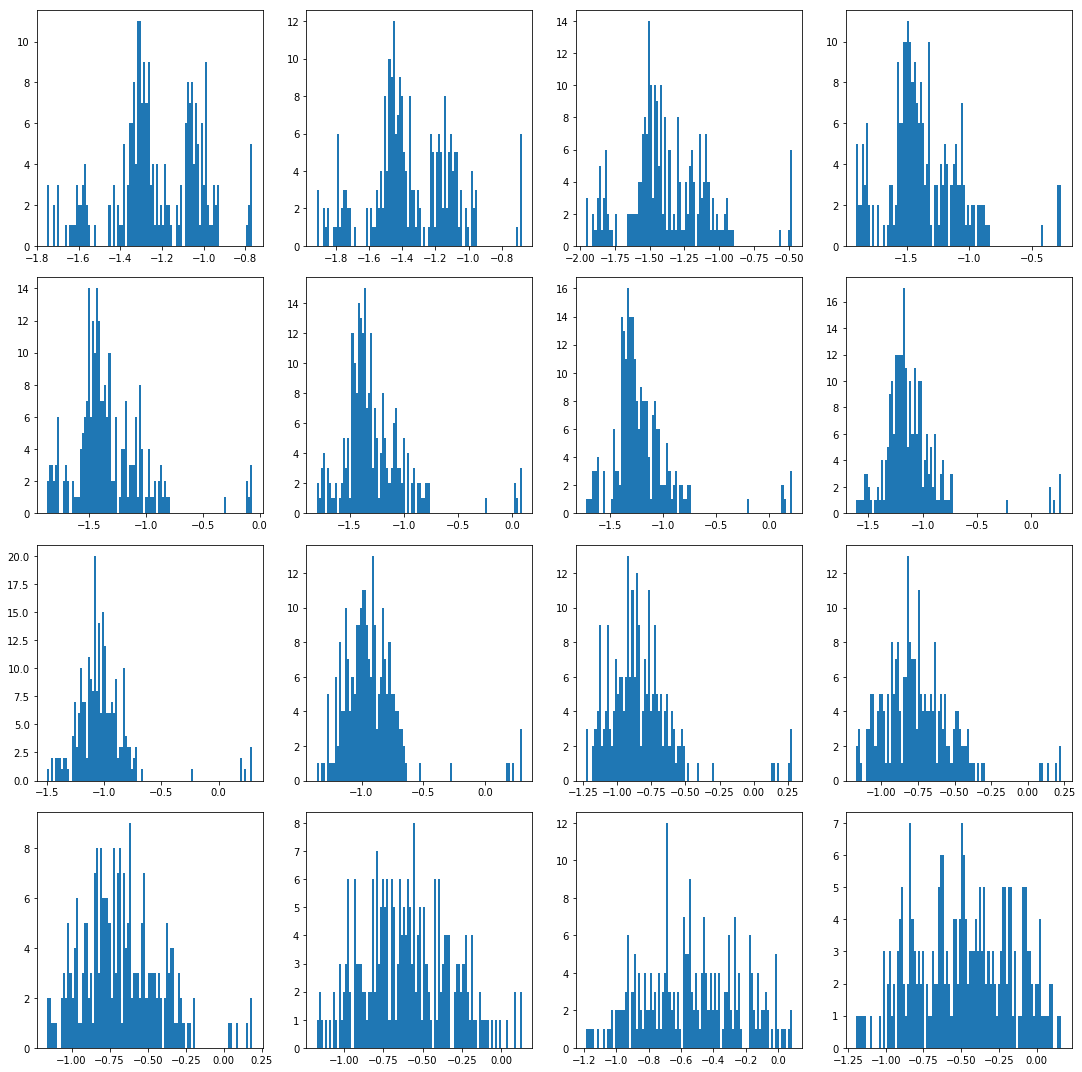

In [453]:
f,a = plt.subplots(4,4,figsize=(15,15))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(res.iloc[:,idx],bins=100)
plt.tight_layout()
plt.show()

In [454]:
from scipy.stats import normaltest

for column in res.columns:
    statistic,p_value = normaltest(res[column])
    print ('The p-value of normal distribution test for Residual for '+str(column)+' is: '+str(p_value))

The p-value of normal distribution test for Residual for ED5 is: 0.2495605075693519
The p-value of normal distribution test for Residual for ED6 is: 0.6219855140264048
The p-value of normal distribution test for Residual for ED7 is: 1.3447762173460167e-05
The p-value of normal distribution test for Residual for ED8 is: 6.657636708218271e-12
The p-value of normal distribution test for Residual for ED9 is: 4.217446377703824e-20
The p-value of normal distribution test for Residual for ED10 is: 1.9296999679207456e-27
The p-value of normal distribution test for Residual for ED11 is: 2.3561702569472007e-33
The p-value of normal distribution test for Residual for ED12 is: 2.0428774254147252e-36
The p-value of normal distribution test for Residual for ED13 is: 2.259221558998816e-37
The p-value of normal distribution test for Residual for ED14 is: 1.4188369530248048e-34
The p-value of normal distribution test for Residual for ED15 is: 1.8079825412184486e-27
The p-value of normal distribution te

Conclusion: 3 of the 16 contracts are not normal distribution, 13 of the 16 contracts are normal distribution.

### 5. Repeat step 4 for the first 3 months of 2015 (3m out-of-sample)

In [457]:
settle_sample2 = settle['2015-01-01':'2015-03-31'] # 3m out-of-sample
res2 = pd.DataFrame(index=settle_sample2.index, columns=settle_sample2.columns)

for date in settle_sample2.index:
    market_rate = settle_sample2.loc[date]
    m = Model(0,0,best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho)
    f_fut = Fitter(m,market_rate,term)
    fo = f_fut.fit_x([0,0])
    m.update_params([fo.x[0],fo.x[1],best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho])
    rate_Q = [m.fwd_rate(t,t,t+0.25)*100 for t in term]
    res2.loc[date] = rate_Q-market_rate

stationarity

In [458]:
# test ADF of the data
import statsmodels.tsa.stattools as ts

def stationary_test(data):
    adf = ts.adfuller(data, maxlag=1)
    return adf[1] # p-value

In [459]:
for column in res2.columns:
    pvalue = stationary_test(res2[column].values)
    print ('The P-value of Residuals for '+str(column)+' is: '+str(pvalue))

The P-value of Residuals for ED5 is: 0.28497435042124797
The P-value of Residuals for ED6 is: 0.4002176957232756
The P-value of Residuals for ED7 is: 0.305483972616859
The P-value of Residuals for ED8 is: 0.26384714469645426
The P-value of Residuals for ED9 is: 0.25742808005973433
The P-value of Residuals for ED10 is: 0.2706770069666608
The P-value of Residuals for ED11 is: 0.2797939122369592
The P-value of Residuals for ED12 is: 0.3484418814156568
The P-value of Residuals for ED13 is: 0.26813656851317924
The P-value of Residuals for ED14 is: 0.23685234518096032
The P-value of Residuals for ED15 is: 0.28359944118103203
The P-value of Residuals for ED16 is: 0.28297874496103914
The P-value of Residuals for ED17 is: 0.2874132603600874
The P-value of Residuals for ED18 is: 0.2857164052905553
The P-value of Residuals for ED19 is: 0.26932741472678023
The P-value of Residuals for ED20 is: 0.26808823397519566


Conclusion: none of the 16 contracts are stationary.

mean-variance (half-life)

In [460]:
from statsmodels.tsa.arima_model import ARMA

def half_life_(data_set):
    model = ARMA(data_set,(1,0)).fit()
    half_life = -np.log(2)/np.log(model.params[1])
    halflife = np.round(half_life,1)
    return halflife

In [480]:
for column in res2.columns:
    HL = half_life_(res2[column].values)
    print ('The Half-life of Residuals for '+str(column)+' is: '+str(HL))

The Half-life of Residuals for ED5 is: 5.8
The Half-life of Residuals for ED6 is: 8.2
The Half-life of Residuals for ED7 is: 6.1
The Half-life of Residuals for ED8 is: 5.5
The Half-life of Residuals for ED9 is: 5.2
The Half-life of Residuals for ED10 is: 5.2
The Half-life of Residuals for ED11 is: 5.0
The Half-life of Residuals for ED12 is: 4.9
The Half-life of Residuals for ED13 is: 1.8
The Half-life of Residuals for ED14 is: 4.7
The Half-life of Residuals for ED15 is: 5.1
The Half-life of Residuals for ED16 is: 5.4
The Half-life of Residuals for ED17 is: 5.6
The Half-life of Residuals for ED18 is: 5.5
The Half-life of Residuals for ED19 is: 5.3
The Half-life of Residuals for ED20 is: 5.3


Volatility

In [463]:
for column in res2.columns:
    volatility = np.std(res2[column].values)
    print ('The Volatility of Residuals for '+str(column)+' is: '+str(volatility))

The Volatility of Residuals for ED5 is: 0.05305690192850437
The Volatility of Residuals for ED6 is: 0.008210605812453971
The Volatility of Residuals for ED7 is: 0.03739379153045148
The Volatility of Residuals for ED8 is: 0.04566224329637932
The Volatility of Residuals for ED9 is: 0.04509791980951689
The Volatility of Residuals for ED10 is: 0.036600435955764406
The Volatility of Residuals for ED11 is: 0.025454541998007677
The Volatility of Residuals for ED12 is: 0.013560431236624872
The Volatility of Residuals for ED13 is: 0.004296301393539085
The Volatility of Residuals for ED14 is: 0.014562459917670523
The Volatility of Residuals for ED15 is: 0.026664407255195643
The Volatility of Residuals for ED16 is: 0.037730077393584756
The Volatility of Residuals for ED17 is: 0.047423800606992084
The Volatility of Residuals for ED18 is: 0.05529134188767486
The Volatility of Residuals for ED19 is: 0.062264920391157885
The Volatility of Residuals for ED20 is: 0.06956780232851724


shape of distribution

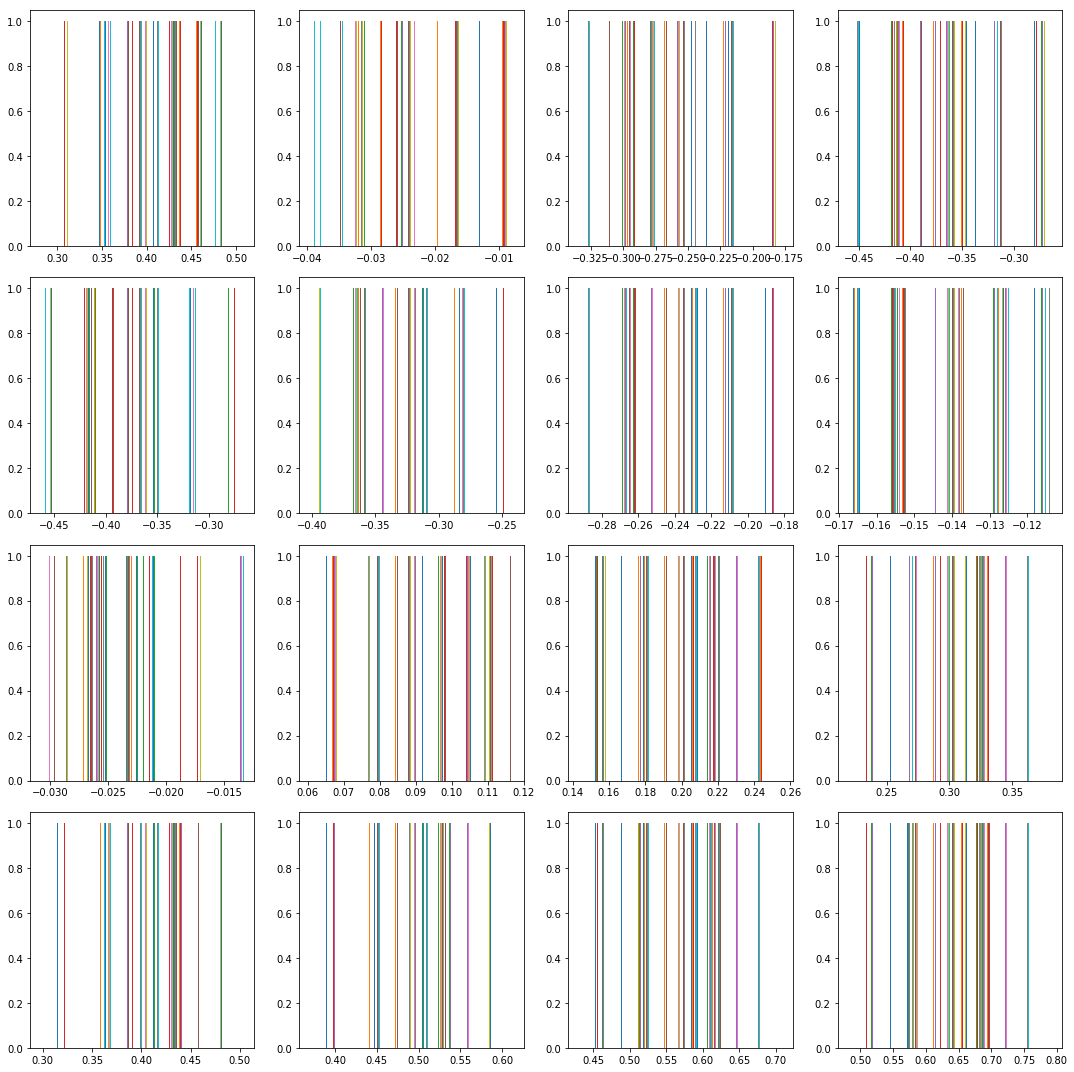

In [466]:
f,a = plt.subplots(4,4,figsize=(15,15))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(res2.iloc[:,idx],bins=5)
plt.tight_layout()
plt.show()

In [465]:
from scipy.stats import normaltest

for column in res2.columns:
    statistic,p_value = normaltest(res2[column])
    print ('The p-value of normal distribution test for Residual for '+str(column)+' is: '+str(p_value))

The p-value of normal distribution test for Residual for ED5 is: 0.4013985693906555
The p-value of normal distribution test for Residual for ED6 is: 0.06597179263441784
The p-value of normal distribution test for Residual for ED7 is: 0.21123875470862688
The p-value of normal distribution test for Residual for ED8 is: 0.5900153643540742
The p-value of normal distribution test for Residual for ED9 is: 0.5610706653715238
The p-value of normal distribution test for Residual for ED10 is: 0.7914746443788159
The p-value of normal distribution test for Residual for ED11 is: 0.6436023098611168
The p-value of normal distribution test for Residual for ED12 is: 0.2910832399195244
The p-value of normal distribution test for Residual for ED13 is: 0.05702372182984913
The p-value of normal distribution test for Residual for ED14 is: 0.12963459384290452
The p-value of normal distribution test for Residual for ED15 is: 0.5094748334807295
The p-value of normal distribution test for Residual for ED16 is: 

Conclusion: none of the 16 contracts are normal distribution.

### 6. Use the model you estimated to compute probability of negative short rates at horizon = 10yrs. How sensitive is this result to various model parameters, p & c?

In [467]:
# 10 years, 2520 trading days
mean = np.array([0,0])
cov = np.array([[1,-0.6],[-0.6,1]])
Wt_list = np.random.multivariate_normal(mean,cov,size=2521)
W1_list = Wt_list[:,0]
W2_list = Wt_list[:,1]
dW1_list = W1_list[1:]-W1_list[:-1]
dW2_list = W2_list[1:]-W2_list[:-1]

dt = 1
x1_list = [0]
x2_list = [0]
for i in range(2520):
    x1_list.append((best_mu1-best_kappa1*x1_list[-1])*dt+best_sigma1*dW1_list[i]+x1_list[-1])
    x2_list.append((best_mu2-best_kappa2*x2_list[-1])*dt+best_sigma2*dW2_list[i]+x2_list[-1])
r = x1_list[-1]+x2_list[-1]

In [468]:
def Vasicek_2F(param,days):
    mu1 = param[0]
    mu2 = param[1]
    kappa1 = param[2]
    kappa2 = param[3]
    sigma1 = param[4]
    sigma2 = param[5]
    rho = param[6]
    
    mean = np.array([0,0])
    cov = np.array([[1,rho],[rho,1]])
    Wt_list = np.random.multivariate_normal(mean,cov,size=days+1)
    W1_list = Wt_list[:,0]
    W2_list = Wt_list[:,1]
    dW1_list = W1_list[1:]-W1_list[:-1]
    dW2_list = W2_list[1:]-W2_list[:-1]
    
    dt = 1
    x1_list = [0]
    x2_list = [0]
    for i in range(2520):
        x1_list.append((mu1-kappa1*x1_list[-1])*dt+sigma1*dW1_list[i]+x1_list[-1])
        x2_list.append((mu2-kappa2*x2_list[-1])*dt+sigma2*dW2_list[i]+x2_list[-1])
    r = x1_list[-1]+x2_list[-1]
    return r

In [469]:
def Monte_Carlo(N,param):
    r_list = []
    for j in range(N):
        r_list.append(Vasicek_2F(param,2520)) # 10 years, 2520 trading days
    return r_list

In [472]:
N = 10000
param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
r_list = Monte_Carlo(10000,param)
print ('The probability of negative short rates at horizon=10yrs is:',
       sum([r_list[i]>0 for i in range(len(r_list))])/N)

The probability of negative short rates at horizon=10yrs is: 0.5398


Sensitivity of different parameters

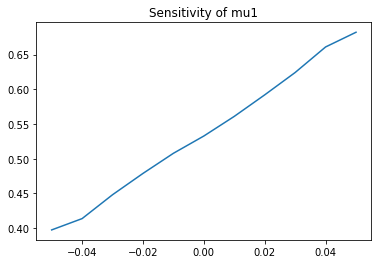

In [496]:
# mu1
prob_list_mu1 = []

for change in np.linspace(-0.05,0.05,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[0] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_mu1.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.05,0.05,11),prob_list_mu1)
plt.title('Sensitivity of mu1')
plt.show()

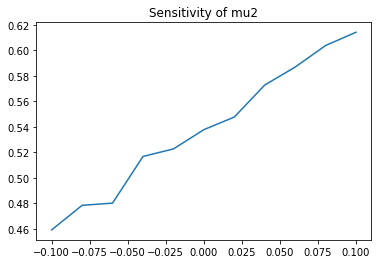

In [490]:
# mu2
prob_list_mu2 = []

for change in np.linspace(-0.1,0.1,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[1] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_mu2.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.1,0.1,11),prob_list_mu2)
plt.title('Sensitivity of mu2')
plt.show()

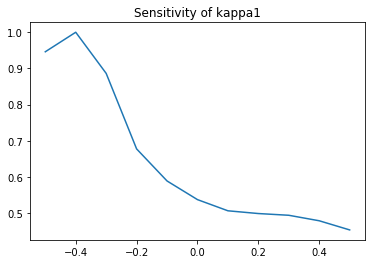

In [491]:
# kappa1
prob_list_kappa1 = []

for change in np.linspace(-0.5,0.5,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[2] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_kappa1.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.5,0.5,11),prob_list_kappa1)
plt.title('Sensitivity of kappa1')
plt.show()

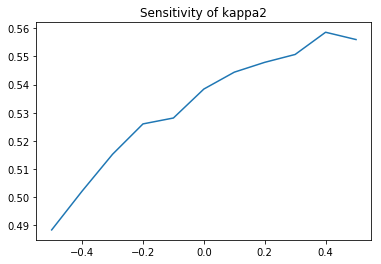

In [492]:
# kappa2
prob_list_kappa2 = []

for change in np.linspace(-0.5,0.5,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[3] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_kappa2.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.5,0.5,11),prob_list_kappa2)
plt.title('Sensitivity of kappa2')
plt.show()

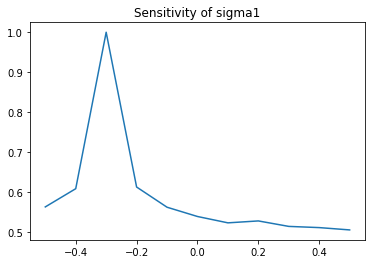

In [493]:
# sigma1
prob_list_sigma1 = []

for change in np.linspace(-0.5,0.5,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[4] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_sigma1.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.5,0.5,11),prob_list_sigma1)
plt.title('Sensitivity of sigma1')
plt.show()

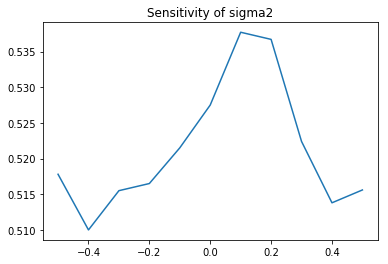

In [494]:
# sigma2
prob_list_sigma2 = []

for change in np.linspace(-0.5,0.5,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[5] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_sigma2.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.5,0.5,11),prob_list_sigma2)
plt.title('Sensitivity of sigma2')
plt.show()

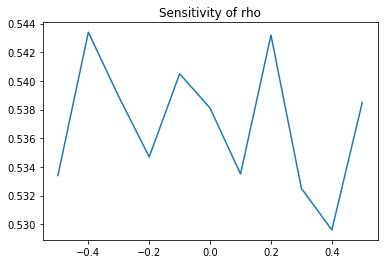

In [495]:
# rho
prob_list_rho = []

for change in np.linspace(-0.5,0.5,11):
    param = [best_mu1,best_mu2,best_kappa1,best_kappa2,best_sigma1,best_sigma2,best_rho]
    param[6] += change
    r_list = Monte_Carlo(10000,param)
    prob_list_rho.append(sum([r_list[i]>0 for i in range(len(r_list))])/N)

plt.plot(np.linspace(-0.5,0.5,11),prob_list_rho)
plt.title('Sensitivity of rho')
plt.show()

Conclusion:
- Drift (p): probability is sensitive to p; mu1,mu2,kapp1 positive; kappa2 negative
- Diffusion (c): probability is not sensitive to c

# Problem2

### 1. Historical Sample: June-2004 - June-2006 with 1M column excluded

In [199]:
CMT = pd.read_excel('Daily Treasury Yield Curve Rates.xlsx', index_col='Date')
CMT.index = pd.to_datetime(CMT.index)
CMT_sample = CMT.drop(['1 Mo'],axis=1)
CMT_sample = CMT_sample.drop(['2 Mo'],axis=1)
CMT_sample = CMT_sample['2004-06-01':'2006-06-30']
CMT_sample.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2004-06-01,1.17,1.44,1.89,2.60,3.14,3.86,4.31,4.71,5.45,NaN
2004-06-02,1.17,1.45,1.92,2.65,3.19,3.91,4.35,4.74,5.47,NaN
2004-06-03,1.17,1.45,1.91,2.63,3.17,3.89,4.34,4.71,5.46,NaN
2004-06-04,1.21,1.51,1.97,2.70,3.25,3.97,4.41,4.78,5.51,NaN
2004-06-07,1.24,1.54,1.96,2.67,3.22,3.95,4.39,4.78,5.51,NaN


### 2. Use CCA to construct a cointegrated vector z(t) from 5y,7y,10y CMT yields

In [24]:
import statsmodels.api as sm

def CCA_Chou_Ng(data_set):
    
    #data_set is pandas dataframe
    df_lag = data_set.shift(1).dropna()
    df = data_set.drop(data_set.index[0]).dropna()
    n = len(data_set.columns)
    
    #X(t) ~ M_1 + X(t-1)
    X = df_lag.as_matrix()
    X_I = sm.add_constant(X)
    Y = df.as_matrix()
    l1 = sm.OLS(Y,X_I).fit()
    B=l1.params[1:(n+1)]
    
    #X(t-1) ~ M_2 + X(t)
    Y_I = sm.add_constant(Y)
    l2 = sm.OLS(X,Y_I).fit()
    A=l2.params[1:(n+1)]
    C = np.dot(A,B)
    eig_val, eig_vec = np.linalg.eig(C)
    return eig_val, eig_vec, C

Assume the The weights of 5y, 7y and 10yr are w1,-1,w2 relatively and w1+w2=1

In [29]:
legs = ['5 Yr', '10 Yr']
belly = '7 Yr'
flylist = [legs[0],belly, legs[1]]
CMT_sample_flylist = CMT_sample.ix[:,flylist]
n = len(CMT_sample_flylist.columns)
val, vec, C = CCA_Chou_Ng(CMT_sample_flylist)
vec = pd.DataFrame(vec)
vec = vec.rename(columns=lambda x: n-x-1, inplace=False)
# print (vec)
w = vec[2].values
w_flylist = [-w[0]/w[1],-1,-w[2]/w[1]]
print ('The weight for 5Y,7Y,10Y is: ',w_flylist)

The weight for 5Y,7Y,10Y is:  [0.4405778459886615, -1, 0.5780147778153462]


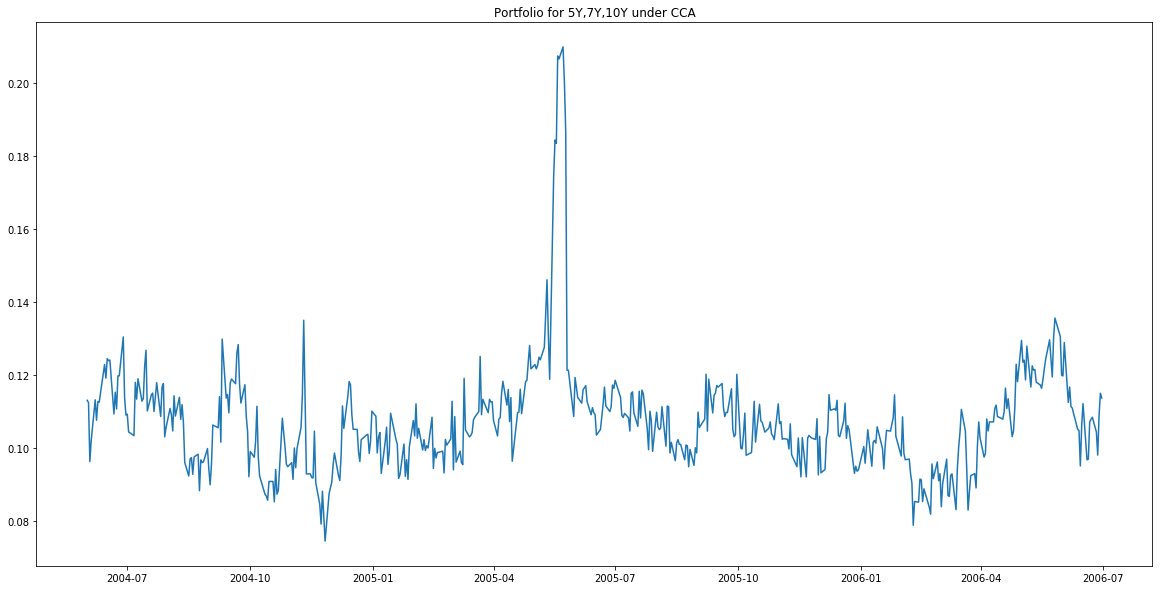

In [35]:
rate_flylist = pd.Series(w_flylist[0]*CMT_sample['5 Yr'] + 
                         w_flylist[1]*CMT_sample['7 Yr'] + 
                         w_flylist[2]*CMT_sample['10 Yr'])

plt.figure(figsize=(20,10))
plt.plot(rate_flylist)
plt.legend(loc = 'best')
plt.title('Portfolio for 5Y,7Y,10Y under CCA')
plt.show()

### 3. Fit an AR(1) model to z(t) and describe it's properties. Is AR(1) a good model for z(t)?

In [207]:
model = ARMA(rate_flylist,(1,0)).fit()
coeff = model.params[1]
interc = model.params[0]
print ('The constant is:',interc)
print ('The coefficient is:',coeff)

The constant is: 0.10747485571198914
The coefficient is: 0.8519475249761694


In [114]:
model.params

const      0.107475
ar.L1.y    0.851948
dtype: float64

The AR(1) model is Z(t) = 0.1075 + 0.8519*Z(t-1)

In [196]:
# test ADF of the data
import statsmodels.tsa.stattools as ts
ts.adfuller(rate_flylist, maxlag=1)

(-5.047221340385158,
 1.7881603068812082e-05,
 1,
 520,
 {'1%': -3.4429882202506255,
  '10%': -2.569738849852071,
  '5%': -2.8671142122781066},
 -3567.066864659214)

Conclusion: p-value is 1.788e-05, which is smaller than 0.05. We can reject the null hypothesis and state that the data is stable and AR(1) should be a good model for the data.

In [90]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 -3548.2174
Dependent Variable: y                Log-Likelihood:      1783.5    
Date:               2018-12-20 00:02 Scale:               1.0000    
No. Observations:   522              Method:              css-mle   
Df Model:           2                Sample:              06-01-2004
Df Residuals:       520                                   06-30-2006
Converged:          1.0000           S.D. of innovations: 0.008     
AIC:                -3560.9904       HQIC:                -3555.988 
-----------------------------------------------------------------------
            Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
const       0.1075      0.0023    46.3322    0.0000    0.1029    0.1120
ar.L1.y     0.8519      0.0227    37.5416    0.0000    0.8075    0.8964
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.1738             0.0000           1.1738             0.0000
====================================================================

"""

We can see from the summry of AR(1) model, the p-value for const and coefficient are both smaller than 0.05, which means the estimate of const and coefficient is significant. So AR(1) is a good model.

### 4. Study the quality of t+Half-Life (t+HL) forecast in-sample using at least 2 signal quality metrics. You have to generate this forecast for every day in the Historical Sample, and compare with actual realizations at t+HL

#### Define alpha: alpha(t)=E[z(t+HL)]-z(t)

In [258]:
import statsmodels.api as sm

def half_life(data_set, model):
    half_life = -np.log(2)/np.log(model.params[1])
    halflife = np.round(half_life,1)
    return halflife

In [259]:
half_life = half_life(rate_flylist, model)
print ('The half life of the in-sample dataset is:', half_life)
half_life = int(half_life)

The half life of the in-sample dataset is: 4.3


In [217]:
rate_flylist_predict = model.predict(start='2004-06-01', end='2006-06-30')

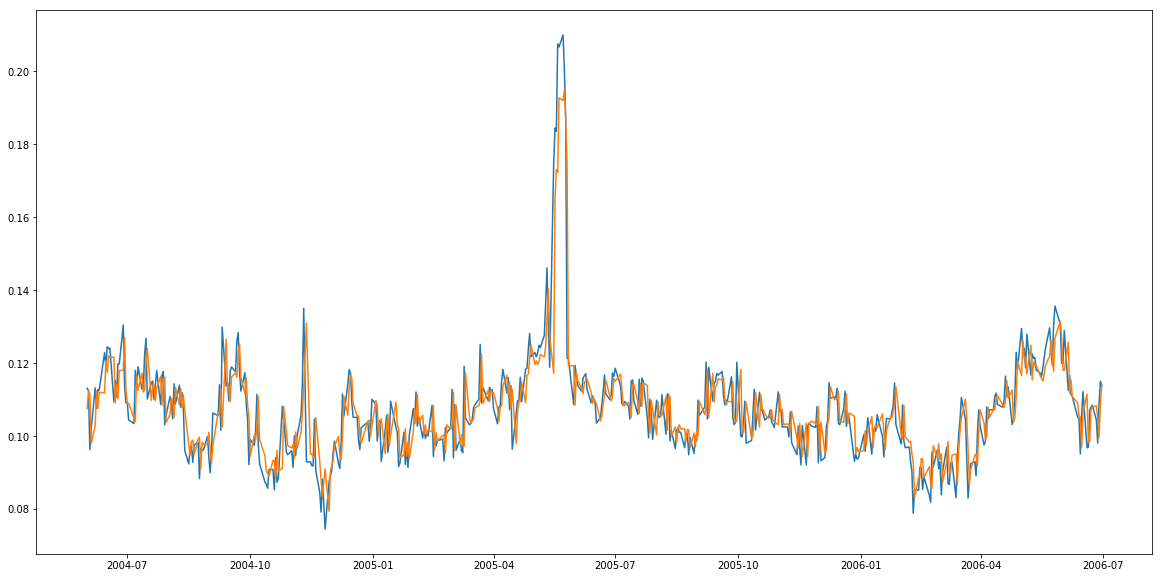

In [219]:
plt.figure(figsize=(20,10))
plt.plot(rate_flylist)
plt.plot(rate_flylist_predict)
plt.show()

In [510]:
alpha = rate_flylist_predict[half_life:].values - rate_flylist[:-half_life].values
error = rate_flylist_predict[half_life:].values - rate_flylist[half_life:].values

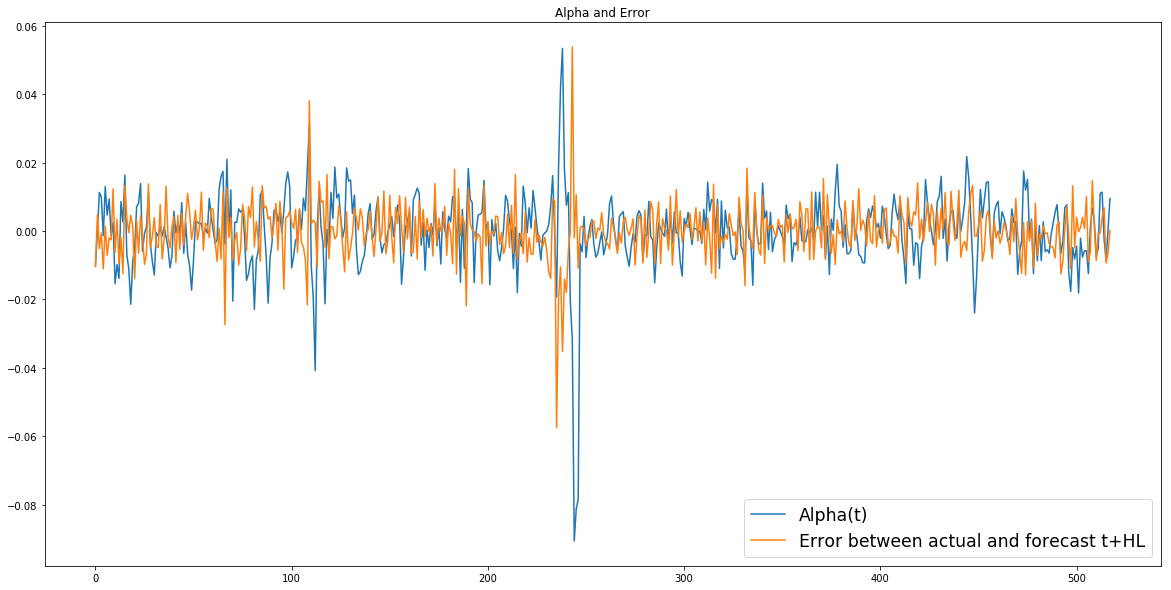

In [314]:
plt.figure(figsize=(20,10))
plt.plot(alpha, label='Alpha(t)')
plt.plot(error, label='Error between actual and forecast t+HL')
plt.title('Alpha and Error')
plt.legend(loc='lower right',fontsize='xx-large')
plt.show()

#### Does the quality of forecast change with the magnitude of alpha?

In [511]:
# method 1: build a linear regression, and check for the coefficient
alpha_I = sm.add_constant(alpha[half_life:])
l1 = sm.OLS(error[:-half_life],alpha_I).fit()
print ('The coefficient between alpha and error is:',l1.params[1])

The coefficient between alpha and error is: 0.24764887000980226


In [512]:
# method 2: calculate the correlation
print ('The correlation between alpha and error is:',np.corrcoef(alpha,error)[0,1])

The correlation between alpha and error is: 0.07620415895766317


In [513]:
# method 3: rank-based correlation
from scipy.stats import spearmanr

coef, p = spearmanr(alpha,error)
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.197
Samples are correlated (reject H0) p=0.000


Conclusion: The quality of forecast does not change with the magnitude of alpha.

#### Study the quality of t+Half-Life (t+HL) forecast in-sample

In [167]:
def R_squared(actual_, model_):
    SS_res = sum((actual_-model_)**2)
    SS_tol = sum((actual_-actual_.mean())**2)
    return (1-SS_res/SS_tol)

In [168]:
def mean_squared_error(actual_, model_):
    return ((actual_-model_)**2).mean()

In [193]:
actual_ = rate_flylist[:-5]

model_ = [actual_[i] for i in range(0,5)]
# for i in range(len(CMT_sample.index)-10):
#     pre = model_[-5]
#     pos = ARforecast(coeff, interc, half_life, pre)
#     model_.append(pos)
    
for i in range(len(CMT_sample.index)-10):
    date = CMT_sample.index[i]
    
    pre = rate_flylist[date]
    pos = ARforecast(coeff, interc, half_life, pre)
    
    model_.append(pos)

In [265]:
print ('R-squared of the forecast is:', R_squared(rate_flylist,rate_flylist_predict))
print ('Mean Squared Error of the forecast is:', mean_squared_error(rate_flylist,rate_flylist_predict))

R-squared of the forecast is: 0.7279396574111041
Mean Squared Error of the forecast is: 6.296215713660941e-05


Conclusion: The forecast is a good one. The R-squared is 72.79%, which means that 72.79% of the data can be AR(1) model explained. But still remaining 27.21% of the data cannot be explained by the model.

### 4. Repeat Step 4 for 90 days out-of-sample

In [301]:
CMT_sample2 = CMT.drop(['1 Mo'],axis=1)
CMT_sample2 = CMT_sample2.drop(['2 Mo'],axis=1)
date_90 = CMT.index
CMT_sample2 = CMT_sample2['2006-07-01':'2006-12-01']
# I don't know when is 90days comleted, I first use a larger dataset
CMT_sample2.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2006-11-27,5.05,5.14,5.00,4.71,4.60,4.54,4.54,4.54,4.73,4.62
2006-11-28,5.04,5.13,4.98,4.67,4.57,4.50,4.50,4.51,4.70,4.59
2006-11-29,5.04,5.13,4.98,4.69,4.58,4.51,4.51,4.52,4.72,4.61
2006-11-30,5.03,5.10,4.94,4.62,4.52,4.45,4.45,4.46,4.66,4.56
2006-12-01,5.03,5.05,4.87,4.52,4.43,4.39,4.39,4.43,4.64,4.54


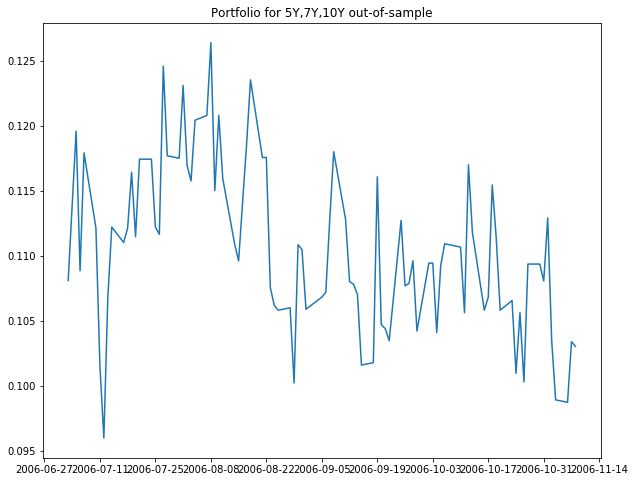

In [302]:
rate_flylist2 = pd.Series(w_flylist[0]*CMT_sample2['5 Yr'] + 
                          w_flylist[1]*CMT_sample2['7 Yr'] + 
                          w_flylist[2]*CMT_sample2['10 Yr'])
rate_flylist2 = rate_flylist2[:90]

plt.figure(figsize=(10,8))
plt.plot(rate_flylist2)
plt.legend(loc = 'best')
plt.title('Portfolio for 5Y,7Y,10Y out-of-sample')
plt.show()

In [304]:
rate_flylist2_predict = model.forecast(90)[0]

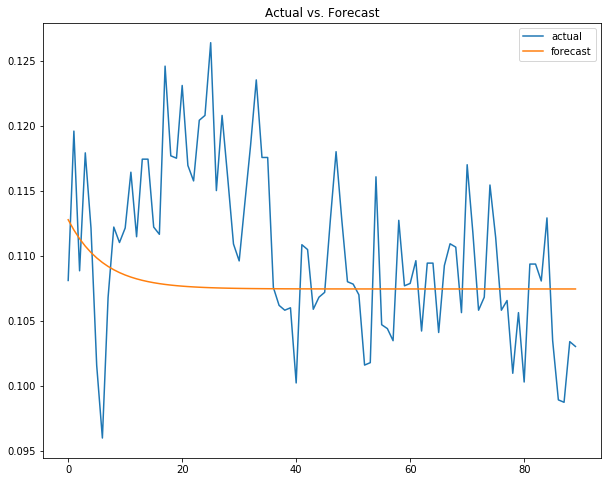

In [305]:
plt.figure(figsize=(10,8))
plt.plot(rate_flylist2.values, label='actual')
plt.plot(rate_flylist2_predict, label='forecast')
plt.legend()
plt.title('Actual vs. Forecast')
plt.show()

In [306]:
alpha2 = rate_flylist2_predict[5:] - rate_flylist2[:-5].values
error2 = rate_flylist2_predict[5:] - rate_flylist2[5:].values

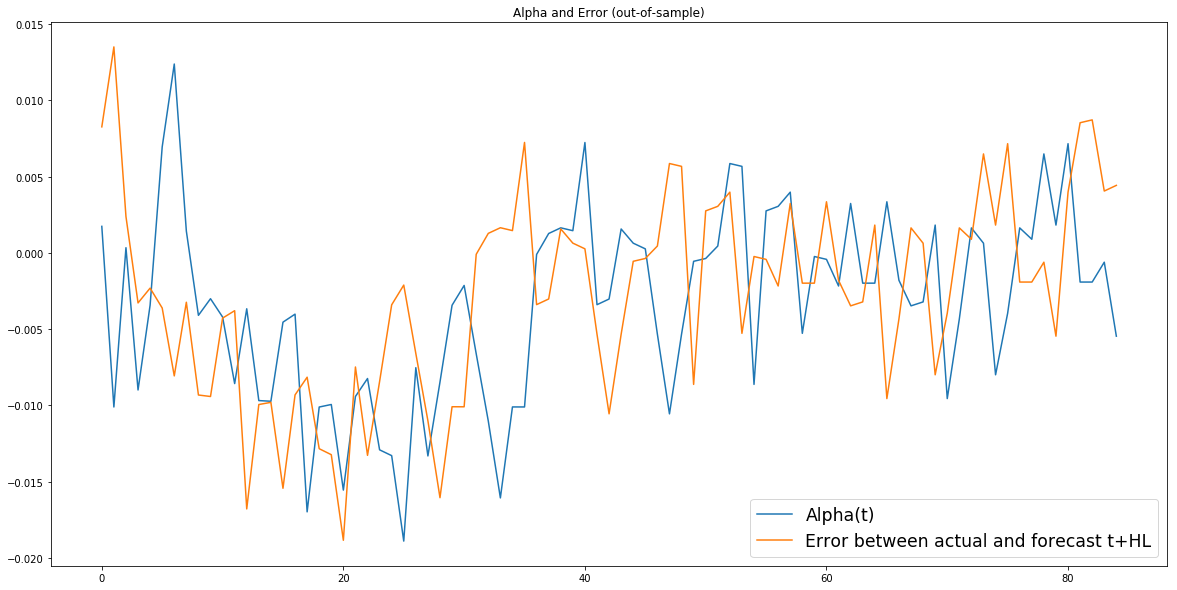

In [315]:
plt.figure(figsize=(20,10))
plt.plot(alpha2, label='Alpha(t)')
plt.plot(error2, label='Error between actual and forecast t+HL')
plt.title('Alpha and Error (out-of-sample)')
plt.legend(loc='lower right',fontsize='xx-large')
plt.show()

In [504]:
# method 1: build a linear regression, and check for the coefficient
alpha2_I = sm.add_constant(alpha2[half_life:])
l2 = sm.OLS(error2[:-half_life],alpha2_I).fit()
print ('The coefficient between alpha and error is:',l2.params[1])

The coefficient between alpha and error is: 0.5832417962012343


In [505]:
# method 2: calculate the correlation
print ('The correlation between alpha and error is:',np.corrcoef(alpha2[half_life:],error2[:-half_life])[0,1])

The correlation between alpha and error is: 0.5749513385643243


In [506]:
# method 3: rank-based correlation
coef, p = spearmanr(alpha2[half_life:],error2[:-half_life])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.570
Samples are correlated (reject H0) p=0.000


Conclusion: The quality of forecast does change with the magnitude of alpha. The coefficient and correlation from method 1,2 and 3 are large.

In [245]:
print ('R-squared of the forecast is:', R_squared(rate_flylist2,rate_flylist2_predict))
print ('Mean Squared Error of the forecast is:', mean_squared_error(rate_flylist2,rate_flylist2_predict))

R-squared of the forecast is: -0.39358809779197346
Mean Squared Error of the forecast is: 5.8524678197235286e-05


Conclusion: AR(1) is not a good model in out-of-sample data. The fact that R-squared is negative means that the AR(1) cannot beat the performance of random walk (just the mean of the data).

### 6. Can you propose a trading strategy using this forecast? Can you suggest improvements of the signal?

Trading strategy:
- We can collect today's alpha
- We assume that error changes with the magnitude of alpha (it also does as I show in previous codes). If alpha is big, then different between expected and actual value of z(t+HL) will be big after 4 days (half-life)
- If alpha is big (positive), different between expected and actual value of z(t+HL) will be big (positive) and it should be the time that we long the portfolio (with weights of 5Y,7Y,10Y futures) at time t and hold for time t+HL (to earn the profit from E(z(t+HL))-z(t+HL)
- If we want to buy the portfolio, we should long the 7Y futures and short 5Y,10Y futures since rates and price are negatively related
- Vice Versa

Improvement of signal:
- increase the correlation between alpha and the different between expected and actual value of z(t+HL)
- increase the forecast model to better fit the z(t)